# Test/Dev Neural Network Architecture

In [33]:
from __future__ import print_function

import sys
import os
import time

import numpy as np

import chb
import matplotlib.pyplot as plt
from helpers import *

import pickle

from sklearn.metrics import matthews_corrcoef, confusion_matrix

import figures

In [30]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def metrics(npz, thresh=0.8):
    npzlen = int(len(npz.files)/2)
    for i in range(1, npzlen + 1):
        pred = (npz['_'.join(['prob', str(i)])] > thresh).astype('int32')
        mcc = matthews_corrcoef(npz['_'.join(['true', str(i)])], pred)
        cm = confusion_matrix(npz['_'.join(['true', str(i)])], pred)
        print('Matthews Correlation Coefficient: \t{}'.format(mcc))
        print('Confusion matrix:\n{}'.format(cm))

## Plotting initial pass for all viable subjects

chb05: 5
chb11: 3
chb17: 3
chb20: 8
chb21: 4
chb22: 3


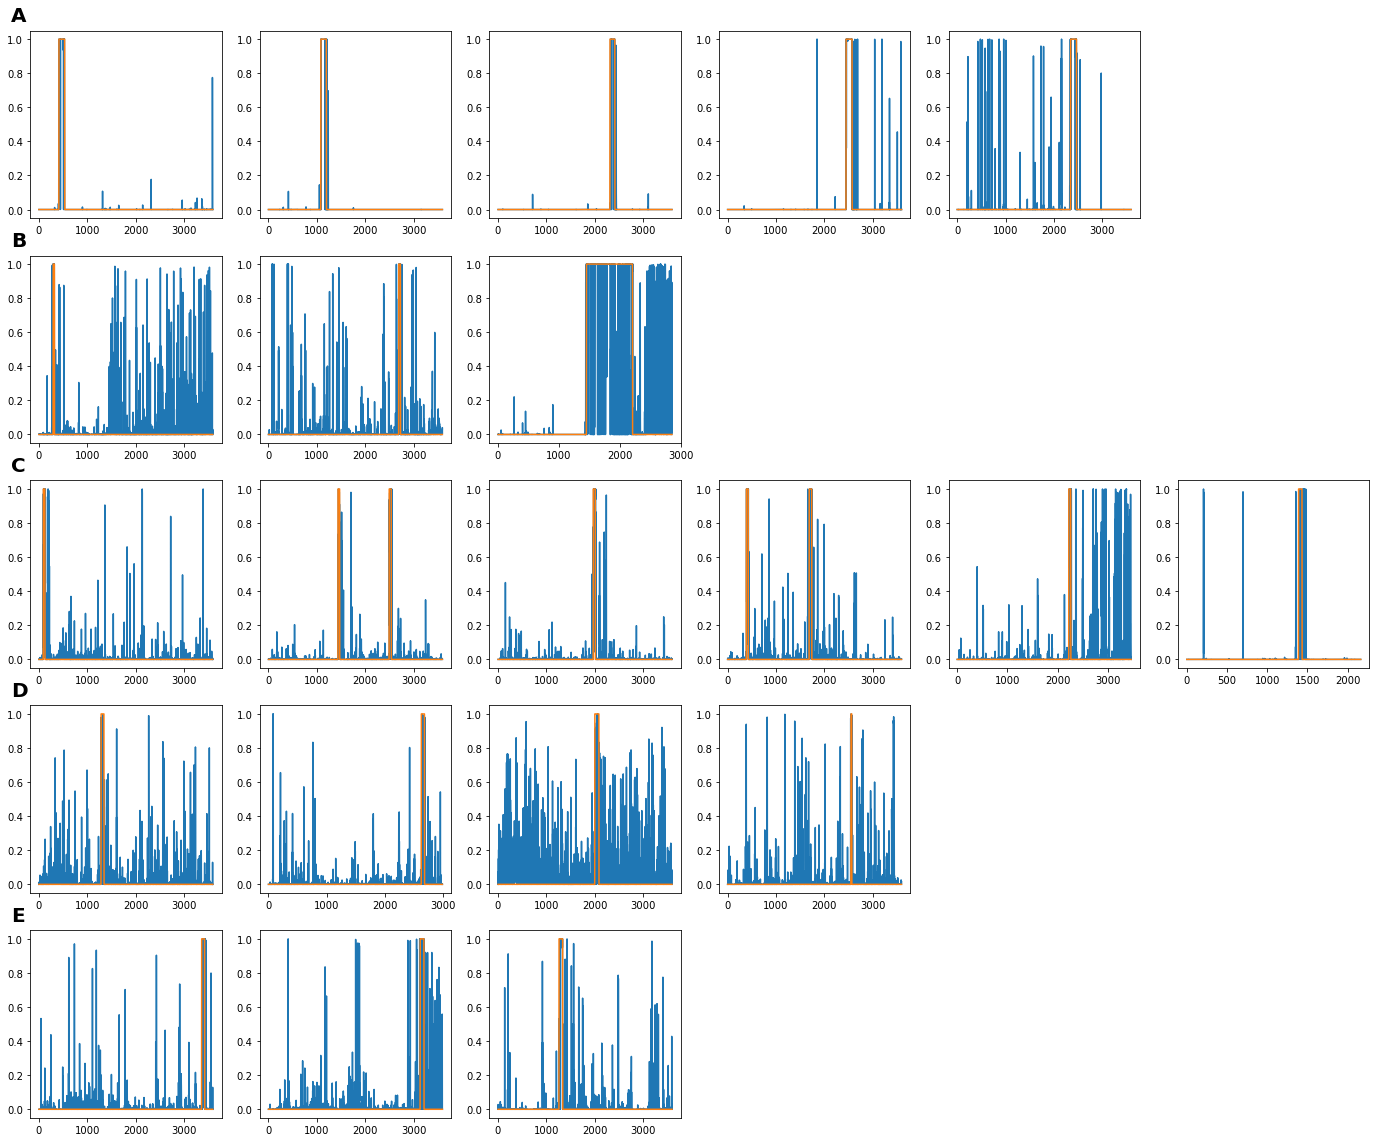

In [6]:
fignum = figures.good_init(1)

The figure above includes the subjects for which a first pass with the ConvNet produced favorable results. The subjects are CHB05, CHB11, CHB20, CHB21, and CHB22. The columns show the output of the ConvNet tested on the seizure file, trained on all others (Leave-One-Out testing). For CHB20, the better of the outputs was chosen for each file that contains two seizures, though they were comparable.

chb01: 7
chb03: 7
chb07: 3
chb08: 5
chb10: 7
chb17: 3
chb18: 6
chb19: 3


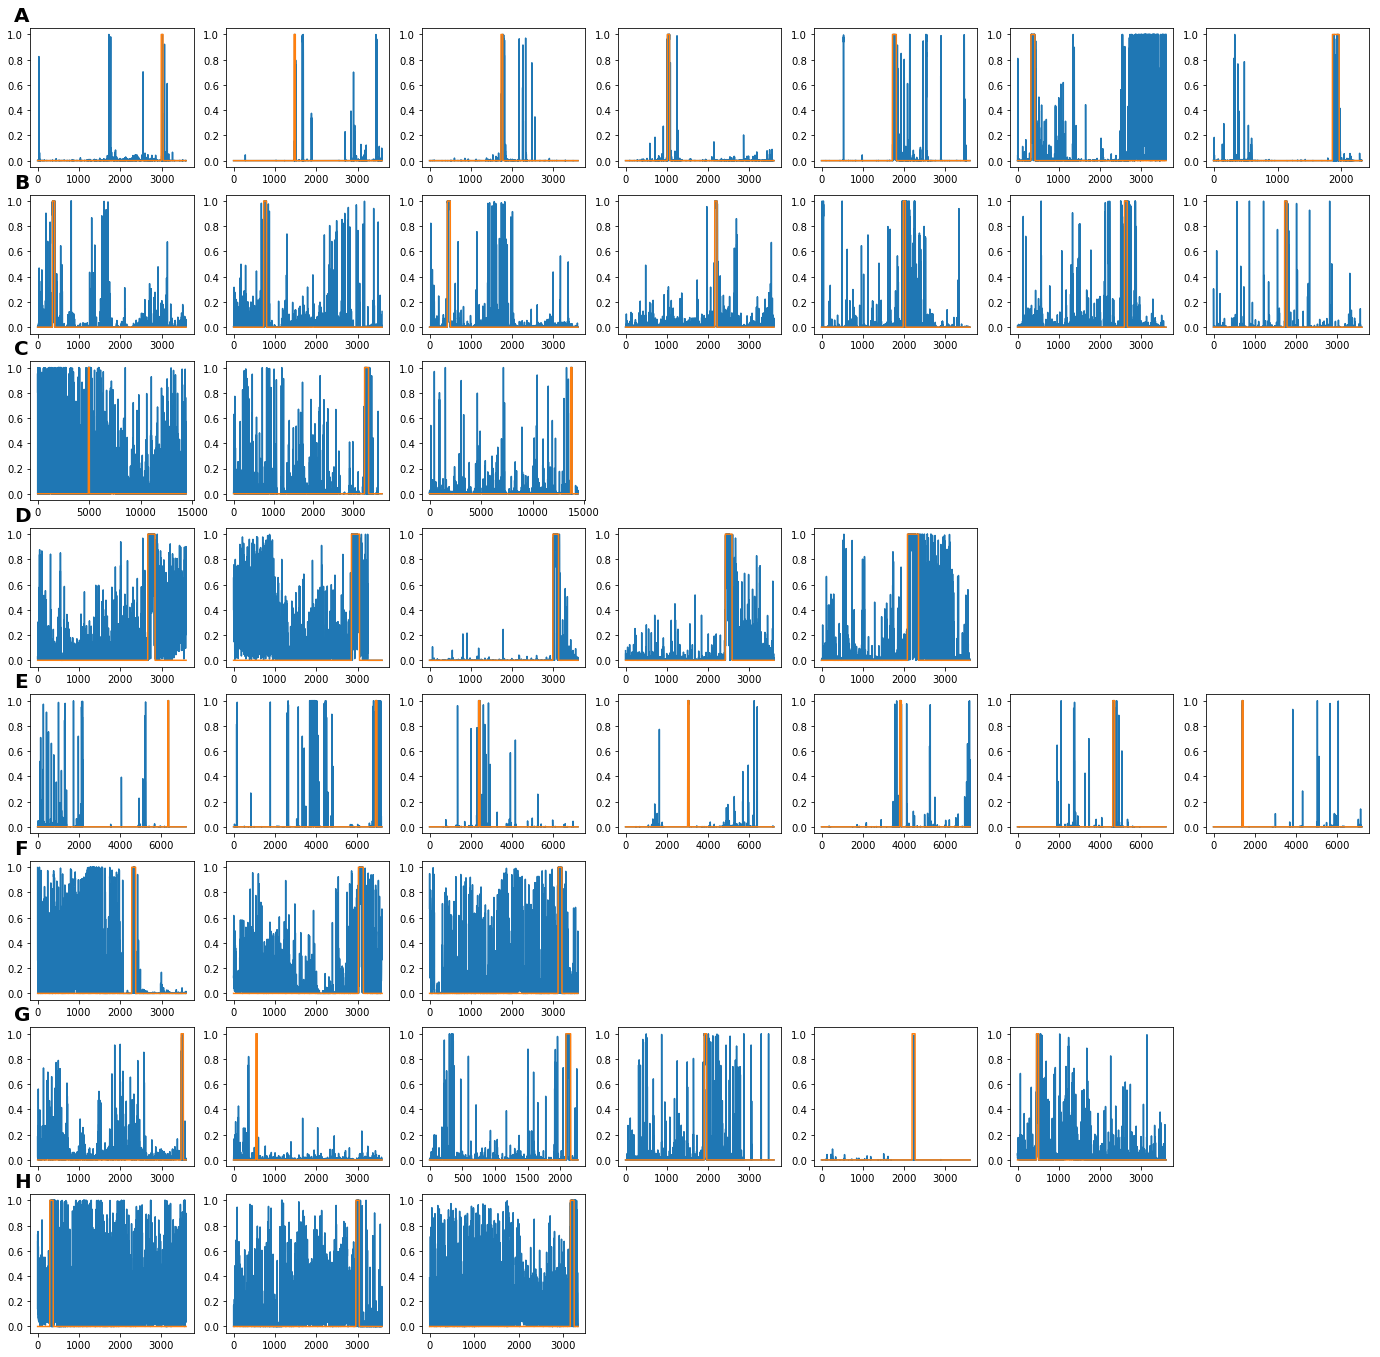

In [9]:
fignum = figures.okay_init(1)

chb02: 2
chb04: 4
chb09: 4


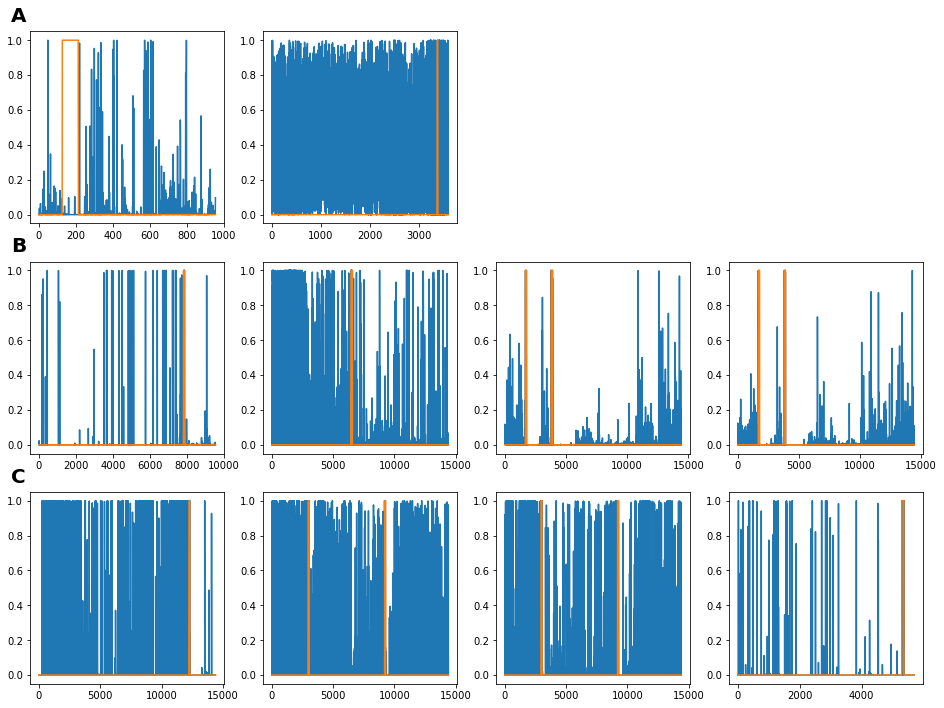

In [10]:
fignum = figures.bad_init(1)

In [11]:
chb10 = np.load('./outputs/chb10init.npz', encoding='latin1')

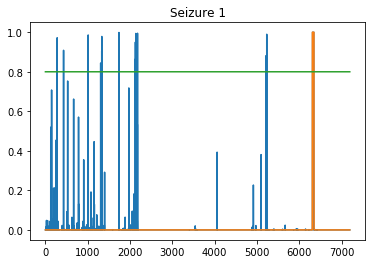

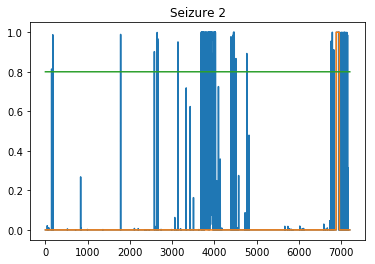

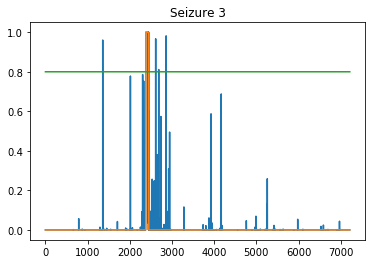

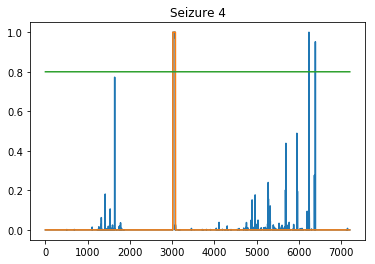

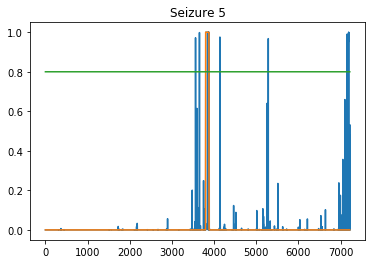

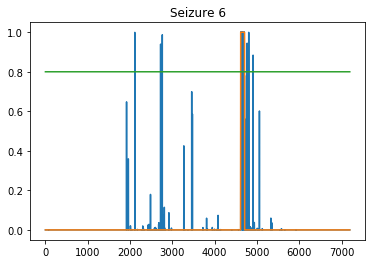

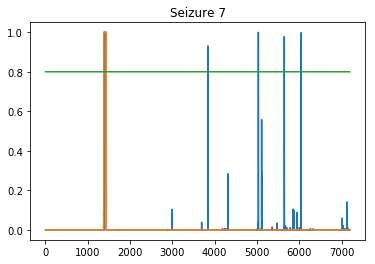

In [12]:
plotprob(chb10)

## Over/Under-Sampling Tests
First, we'll put the test results into dictionaries. Then we'll plot those results.

In [168]:
chb05samp = [
    {'osr':6,'usp':0.97279509,
     'mcc':[0.659999112736,0.614910581808,0.655943125903,
            0.506662167418,0.500317761252],},
    {'osr':5,'usp':0.47548674,
     'mcc':[0.969956264552,0.842557962875,0.920803042474,
            0.906016461937,0.868044450703],},
    {'osr':6,'usp':0.26039901,
     'mcc':[0.98265522272,0.908193284061,0.90419660998,
            0.953574779815,0.884798433933],},
    {'osr':3,'usp':0.48998689,
     'mcc':[0.900923183936,0.845642228485,0.837171076377,
            0.82944341319,0.783161804566],},
    {'osr':4,'usp':0.5038716,
     'mcc':[0.956052875517,0.891476173092,0.857239169232,
            0.902443951583,0.886472984383],},
    {'osr':4,'usp':0.94076041,
     'mcc':[0.47632604846,0.844831609322,0.767630941835,
            0.666575634304,0.461869741583],},
    {'osr':4,'usp':0.062816,
     'mcc':[0.937978274747,0.925710767293,0.89298785734,
            0.897902613369,0.850119851039],},
    {'osr':3,'usp':0.03713701,
     'mcc':[0.951574389245,0.851138249725,0.882438451142,
            0.839085440091,0.834127849656],},
    {'osr':6,'usp':0.07069546,
     'mcc':[0.982626864866,0.86264330942,0.878559279148,
            0.912645969338,0.87848555481],},
    {'osr':6,'usp':0.12884357,
     'mcc':[0.98265522272,0.882907362926,0.898613342349,
            0.949626965984,0.843308699813],},
    {'osr':6,'usp':0.80735164,
     'mcc':[0.978267974817,0.883454955739,0.842866039079,
            0.861357222136,0.669871111545],},
    {'osr':6,'usp':0.77955195,
     'mcc':[0.94922971041,0.853602733604,0.842228813801,
            0.845520890415,0.717656601298],},
    {'osr':4,'usp':0.70136578,
     'mcc':[0.96105771516,0.865389383721,0.904608036566,
               0.851883199229,0.843731087928],},
    {'osr':4,'usp':0.5897232,
     'mcc':[0.924206119349,0.863215160264,0.92119949898,
               0.914644984476,0.878304359492],},
    {'osr':5,'usp':0.86899052,
     'mcc':[0.947890131362,0.861161964696,0.860529878124,
               0.759298855846,0.722659528579],},
]
pickle.dump(chb05samp, open('chb05samptest.p', 'wb'))

In [27]:
chb20samp = [
    {'osr':6, 'usp':0.96988346, # 0
     'mcc':[0.540981395854,0.550597785421,0.583310067086,0.664255601999,
            0.634548314526,0.648648917826,0.223008514099,0.292356620175]},
    {'osr':3,'usp':0.81363392, # 1
     'mcc':[0.589577603986,0.540547876974,0.389502944467,0.79827947514,
            0.64131006571,0.726877785138,0.158888533912,0.267040367705]},
    {'osr':6,'usp':0.28452097, # 2
     'mcc':[0.631884059957,0.760272655978,0.613333568976,0.717049293983,
            0.685880773635,0.712019263772,0.133219188553,0.137618599407]},
    {'osr':4,'usp':0.24318379, # 3
     'mcc':[0.694849081382,0.495048250196,0.547410571674,0.750039913673,
            0.607695279201,0.643797130572,0.142081403616,0.119331724335]},
    {'osr':6,'usp':0.51591069, # 4
     'mcc':[0.577001449321,0.616240387826,0.6117231674,0.744095685134,
            0.658142808676,0.761161468547,0.125941959887,0.125578365389]},
    {'osr':5,'usp':0.22879187, # 5
     'mcc':[0.602243717881,0.62001643421,0.489670168165,0.781510960476,
            0.718932207016,0.755550523156,0.0904215193316,0.168258746655]},
    {'osr':4,'usp':0.4071291, # 6
     'mcc':[0.644432611671,0.511115226111,0.597874842817,0.670633681107,
            0.629306464667,0.688842074547,0.261594879009,0.0722908749906]},
    {'osr':6,'usp':0.48395341, # 7
     'mcc':[0.707159741239,0.615530173098,0.592383765155,0.750850083884,
            0.729271365135,0.751458043599,0.105516090237,0.175504555889]},
    {'osr':5,'usp':0.22309933, # 8
     'mcc':[0.591119766177,0.51694229868,0.591461839239,0.750039913673,
            0.717417266896,0.724091015851,0.160966425332,0.0889393411994]},
    {'osr':4,'usp':0.24176802, # 9
     'mcc':[0.60938907833,0.548135452131,0.522164715784,0.773504194913,
            0.68284341005,0.725539964439,0.202737166817,0.0472655725333]},
]
pickle.dump(chb20samp, open('chb20samptest.p', 'wb'))

In [33]:
chb21samp = [
    {'osr':4,
     'usp':0.67562778,
     'mcc':[0.356854570228, 0.263567586074, 0.151792803992, 0.305683281437],},    
    {'osr':4,
     'usp':0.68228429,
     'mcc':[0.19197466619,0.538383885762,0.473577128062,0.130946740528],},
    {'osr':6,
     'usp':0.58934185,
     'mcc':[0.406755465986,0.406071246179,0.295065503694,0.468073566392],},
    {'osr':5,
     'usp':0.78269928,
     'mcc':[0.348710483264,0.130373894333,0.257524108779,0.286508455002],},
    {'osr':4,
     'usp':0.30917857,
     'mcc':[0.268043052858,0.389284838944,0.501311804467,0.256095257032],},
    {'osr':5,
     'usp':0.35367979,
     'mcc':[0.268043052858,0.233032441664,0.663775611999,0.198495797899],},
    {'osr':3,
     'usp':0.76457202,
     'mcc':[0.168474142468,0.355276215107,0.462126607892,0.185523524593],},
    {'osr':4,
     'usp':0.53239368,
     'mcc':[0.156637343639,0.386873765009,0.271673745244,0.340939551797],},
    {'osr':6,
     'usp':0.2474348,
     'mcc':[0.382682676333,0.525657383421,0.43778602586,0.386426886372],},
    {'osr':6,
     'usp':0.28549516,
     'mcc':[0.365808453647,0.545538550192,0.417255024943,0.299600636954],},
]
pickle.dump(chb21samp, open('chb21samptest.p', 'wb'))

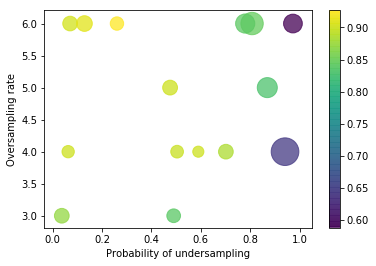

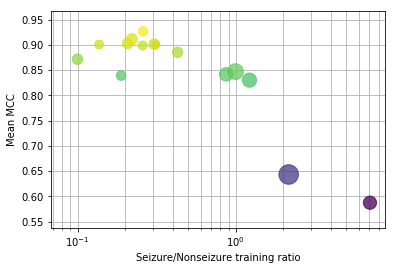

In [16]:
fignum = figures.chb05samptest()

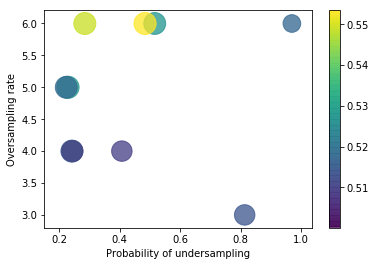

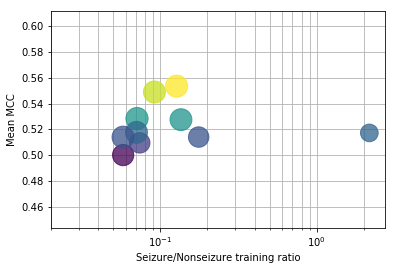

In [18]:
fignum = figures.chb20samptest()

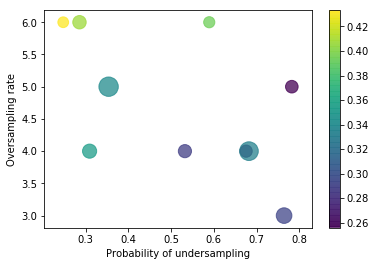

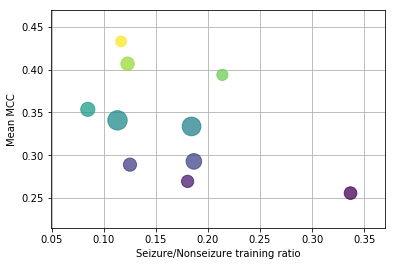

In [19]:
fignum = figures.chb21samptest()

//anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


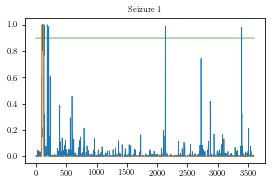

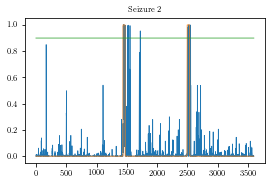

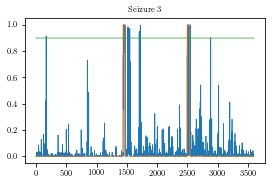

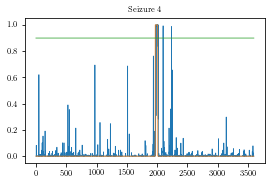

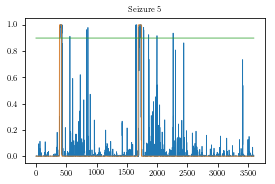

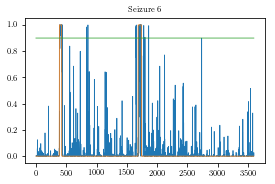

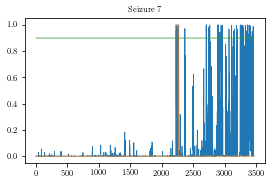

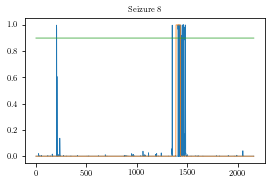

In [122]:
chb20s4 = np.load('./outputs/chb20samp4.npz', encoding='latin1')
plotprob(chb20s4, 0.9)

In [123]:
chb20sProb = [
    np.load('./outputs/chb20samp0.npz', encoding='latin1'),
    np.load('./outputs/chb20samp1.npz', encoding='latin1'),
    np.load('./outputs/chb20samp2.npz', encoding='latin1'),
    np.load('./outputs/chb20samp3.npz', encoding='latin1'),
    np.load('./outputs/chb20samp4.npz', encoding='latin1'),
    np.load('./outputs/chb20samp5.npz', encoding='latin1'),
    np.load('./outputs/chb20samp6.npz', encoding='latin1'),
    np.load('./outputs/chb20samp7.npz', encoding='latin1'),
    np.load('./outputs/chb20samp8.npz', encoding='latin1'),
    np.load('./outputs/chb20samp9.npz', encoding='latin1'),
]

In [124]:
a, b = metrics(chb20s4, 0.9)

In [125]:
probs, preds, trues = npzparse(chb20s4, 0.8)

In [126]:
cmlist, mcclist = supermetrics(preds, trues)
print(mcclist)

[0.57700144932063691, 0.61624038782583035, 0.61172316740029442, 0.74409568513433699, 0.65814280867576025, 0.76116146854716926, 0.12594195988717657, 0.12557836538902639]


## Filtering with LOWESS

In [127]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [128]:
y = chb20s4['prob_8'].squeeze()
print(y.shape)
x = np.arange(len(y))

(2163,)


In [129]:
filt = lowess(y, x, frac=0.005, it=0)

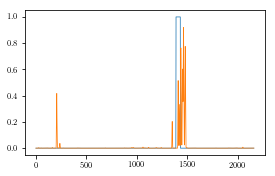

In [130]:
#plt.plot(x, y)
plt.plot(x, chb20s4['true_8'])
plt.plot(filt[:,0], filt[:,1])

In [131]:
filt = lowess(y, x, frac=0.005, it=0)

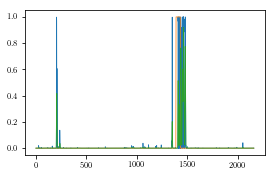

In [132]:
plt.plot(x, y)
plt.plot(x, chb20s4['true_8'])
plt.plot(filt[:,1])

In [133]:
def filtpred(npz, thresh=0.75):
    npzlen = int(len(npz.files)/2)
    filts = []
    fpreds = []
    for i in range(npzlen):
        y = npz['_'.join(['prob', str(i + 1)])].squeeze()
        x = np.arange(len(y))
        filt = lowess(y, x, frac=0.005, is_sorted=True, it=0)
        filts.append(filt[:,1])
        fpred = (filt[:,1] > thresh).astype('int32')
        fpreds.append(fpred)
    return filts, fpreds

In [134]:
filts, fpreds = filtpred(chb20s4)

In [135]:
N = int(len(chb20s4.files)/2)
trues = []
for i in range(N):
    trues.append(chb20s4['_'.join(['true',str(i + 1)])])

In [136]:
cmlist, mcclist = supermetrics(fpreds, trues)

In [137]:
for i in range(len(cmlist)):
    print('CM:\n',cmlist[i])
    print('MCC:\t',mcclist[i])

CM:
 [[3554    8]
 [  12   22]]
MCC:	 0.686070637478
CM:
 [[3512    5]
 [  52   27]]
MCC:	 0.531229602255
CM:
 [[3517    0]
 [  37   42]]
MCC:	 0.725334896038
CM:
 [[3545    8]
 [  10   33]]
MCC:	 0.783410744849
CM:
 [[3496    6]
 [  27   67]]
MCC:	 0.804462873303
CM:
 [[3491   11]
 [  18   76]]
MCC:	 0.836307336721
CM:
 [[3407   18]
 [  40    0]]
MCC:	 -0.00780935775176
CM:
 [[2112    7]
 [  44    0]]
MCC:	 -0.00821080052926


In [138]:
chb05s = np.load('./outputs/chb05samp3.npz', encoding='latin1')
filts, fpreds = filtpred(chb05s)
N = int(len(chb05s.files)/2)
trues = []
for i in range(N):
    trues.append(chb05s['_'.join(['true',str(i + 1)])])
cmlist, mcclist = supermetrics(fpreds, trues)
for i in range(len(cmlist)):
    print('CM:\n',cmlist[i])
    print('MCC:\t',mcclist[i])

CM:
 [[3476    0]
 [   6  114]]
MCC:	 0.97383931414
CM:
 [[3481    0]
 [  24   91]]
MCC:	 0.886502115826
CM:
 [[3495    0]
 [  30   71]]
MCC:	 0.834857814899
CM:
 [[3471    0]
 [   9  116]]
MCC:	 0.962081077664
CM:
 [[3474    0]
 [   8  114]]
MCC:	 0.965546144453


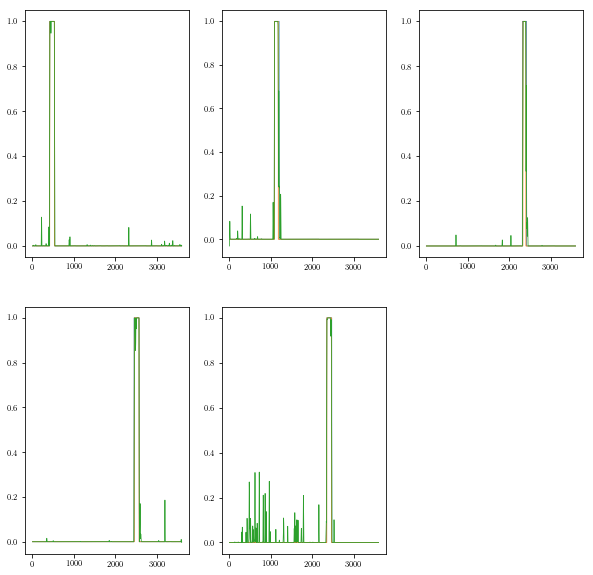

In [141]:
plt.figure(figsize=(10,10))
plt.subplot(231)
plt.plot(chb05s['true_1'])
plt.plot(fpreds[0])
plt.plot(filts[0])
plt.subplot(232)
plt.plot(chb05s['true_2'])
plt.plot(fpreds[1])
plt.plot(filts[1])
plt.subplot(233)
plt.plot(chb05s['true_3'])
plt.plot(fpreds[2])
plt.plot(filts[2])
plt.subplot(234)
plt.plot(chb05s['true_4'])
plt.plot(fpreds[3])
plt.plot(filts[3])
plt.subplot(235)
plt.plot(chb05s['true_5'])
plt.plot(fpreds[4])
plt.plot(filts[4])

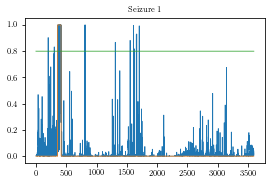

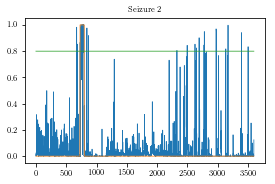

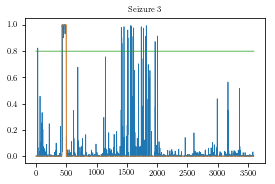

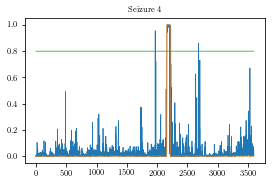

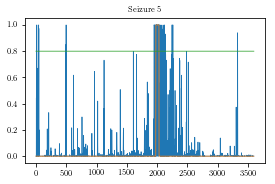

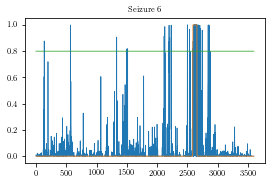

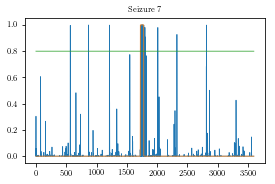

In [142]:
chb3 = np.load('./outputs/chb03init.npz', encoding='latin1')
plotprob(chb3)

In [143]:
filts, fpreds = filtpred(chb3, 0.7)
N = int(len(chb3.files)/2)
trues = []
for i in range(N):
    trues.append(chb3['_'.join(['true',str(i + 1)])])
cmlist, mcclist = supermetrics(fpreds, trues)
for i in range(len(cmlist)):
    print('CM:\n',cmlist[i])
    print('MCC:\t',mcclist[i])

CM:
 [[3539    0]
 [   9   48]]
MCC:	 0.916498306032
CM:
 [[3526    0]
 [  16   54]]
MCC:	 0.876324059572
CM:
 [[3522    0]
 [   8   66]]
MCC:	 0.94332953264
CM:
 [[3539    0]
 [   8   49]]
MCC:	 0.926126474549
CM:
 [[3530   14]
 [  32   20]]
MCC:	 0.469575157193
CM:
 [[3527    0]
 [  60    9]]
MCC:	 0.358124267361
CM:
 [[3538    0]
 [  58    0]]
MCC:	 0.0


//anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:516: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(var_yt * var_yp)


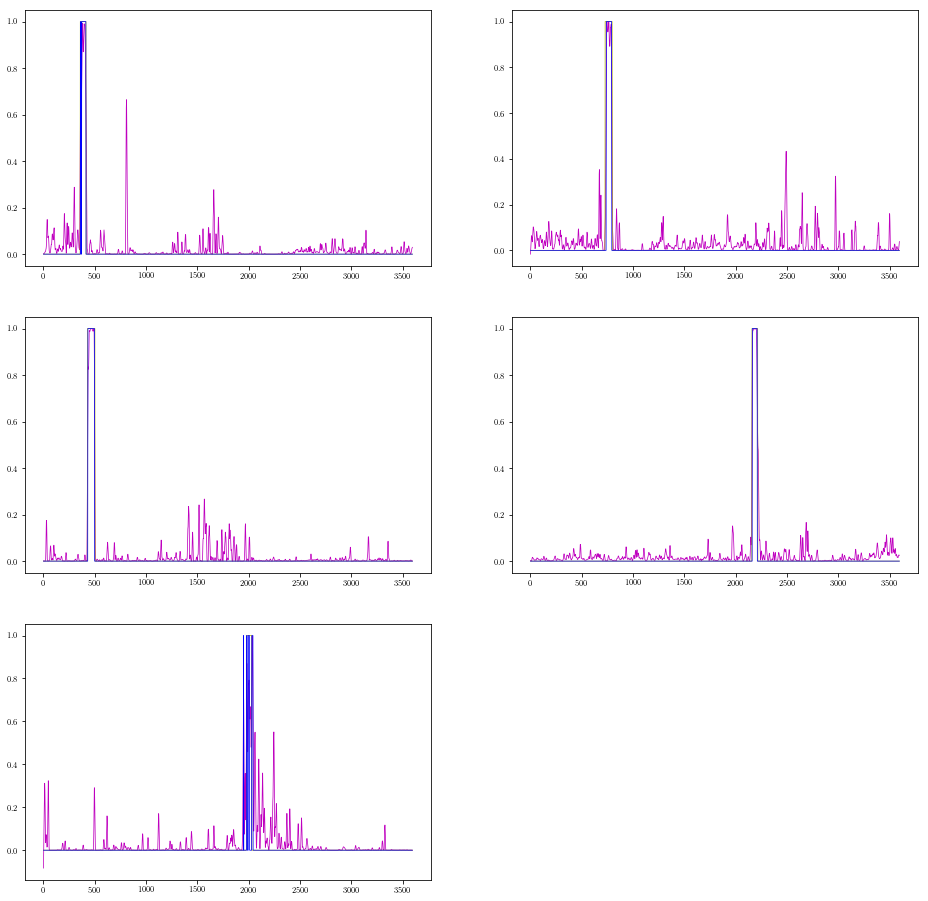

In [144]:
plt.figure(figsize=(16,16))
plt.subplot(321)
plt.plot(filts[0], 'm')
plt.plot(chb3['true_1'], 'y')
plt.plot(fpreds[0], 'b')
plt.subplot(322)
plt.plot(filts[1], 'm')
plt.plot(chb3['true_2'], 'y')
plt.plot(fpreds[1], 'b')
plt.subplot(323)
plt.plot(filts[2], 'm')
plt.plot(chb3['true_3'], 'y')
plt.plot(fpreds[2], 'b')
plt.subplot(324)
plt.plot(filts[3], 'm')
plt.plot(chb3['true_4'], 'y')
plt.plot(fpreds[3], 'b')
plt.subplot(325)
plt.plot(filts[4], 'm')
plt.plot(chb3['true_5'], 'y')
plt.plot(fpreds[4], 'b')


## FCL width testing

In [145]:
chb05fcl = [
    {'fcl':256,
     'mcc':[0.956164601455,0.850901221724,0.876720827433,
            0.903058471323,0.886750204079],},
    {'fcl':150,
     'mcc':[0.969441581754,0.892427807194,0.915441629667,
            0.883385354746,0.868044450703],},
    {'fcl':100,
     'mcc':[0.942529492055,0.921179582825,0.899879389064,
            0.891448399172,0.896908014129],},
    {'fcl':75,
     'mcc':[0.915009682303,0.902317269282,0.889219334106,
            0.888547984575,0.828920472548],},
    {'fcl':50,
     'mcc':[0.965100148634,0.859482740526,0.89485815958,
            0.851815511435,0.751709273644],},
    {'fcl':84,
     'mcc':[0.965100148634,0.852936068444,0.910168825063,
            0.864382277161,0.831348747456],},
    {'fcl':92,
     'mcc':[0.98265522272,0.843660920984,0.89426525508,
            0.859113031668,0.793926639138],},
    {'fcl':118,
     'mcc':[0.978369559791,0.894033209201,0.912252081452,
            0.87009979252,0.874846429687],},
    {'fcl':140,
     'mcc':[0.969419486634,0.876357172376,0.889219334106,
            0.85045150859,0.863316918354],},
    {'fcl':129,
     'mcc':[0.951560785497,0.85808926466,0.915441629667,
            0.873009152129,0.813696997315],},
]
pickle.dump(chb05fcl, open('./tests/chb05fcltest.p', 'wb'))

Tally of seizure and nonseizure

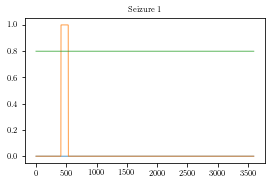

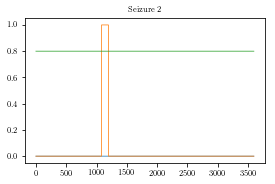

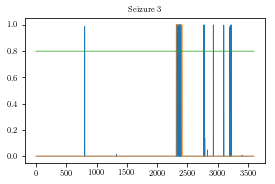

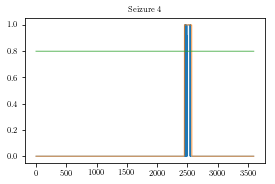

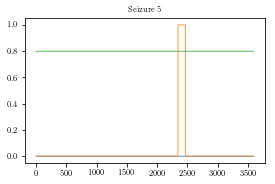

In [148]:
idk = np.load('./outputs/chb05test1.npz', encoding='latin1')
plotprob(idk)

Initial data for all cases

In [149]:
chb01 = np.load('./outputs/chb01us.npz', encoding='latin1')
chb02 = np.load('./outputs/chb02init.npz', encoding='latin1')
chb03 = np.load('./outputs/chb03init.npz', encoding='latin1')
chb04 = np.load('./outputs/chb04init.npz', encoding='latin1')
chb05 = np.load('./outputs/chb05a5long.npz', encoding='latin1')
chb07 = np.load('./outputs/chb07init.npz', encoding='latin1')
chb08 = np.load('./outputs/chb08init.npz', encoding='latin1')
chb09 = np.load('./outputs/chb09us3.npz', encoding='latin1')
chb10 = np.load('./outputs/chb10init.npz', encoding='latin1')
chb11 = np.load('./outputs/chb11init.npz', encoding='latin1')
chb17 = np.load('./outputs/chb17init.npz', encoding='latin1')
chb18 = np.load('./outputs/chb18init.npz', encoding='latin1')
chb19 = np.load('./outputs/chb19init.npz', encoding='latin1')
chb20 = np.load('./outputs/chb20init.npz', encoding='latin1')
chb21 = np.load('./outputs/chb21init.npz', encoding='latin1')
chb22 = np.load('./outputs/chb22init.npz', encoding='latin1')

In [150]:
probs, preds, trues = npzparse(chb01)
cmlist, mcclist = supermetrics(preds, trues)
print('mean(MCC) = {}'.format(np.mean(mcclist)))
print('std(MCC) = {}'.format(np.std(mcclist)))

mean(MCC) = 0.36440692623703513
std(MCC) = 0.22283009372836493


In [151]:
inits = [chb01, chb02, chb03, chb04, chb05, chb07, chb08, chb09,
         chb10, chb11, chb17, chb18, chb19, chb20, chb21, chb22]

In [152]:
for init in inits:
    probs, preds, trues = npzparse(init)
    cmlist, mcclist = supermetrics(preds, trues)
    print(f' & {np.mean(mcclist)} & {np.std(mcclist)} \\\\')

 & 0.36440692623703513 & 0.22283009372836493 \\
 & -0.013136005292345144 & 0.030743954487313322 \\
 & 0.6559521655190185 & 0.1855964162822271 \\
 & 0.3541694945224677 & 0.06664394797611838 \\
 & 0.8972841847622129 & 0.03455678700065854 \\
 & 0.37801250958684046 & 0.11051866480078222 \\
 & 0.7026930585337874 & 0.08005128679555834 \\
 & 0.19897713112719112 & 0.04041560027489877 \\
 & 0.781060246479548 & 0.1695507717730278 \\
 & 0.6090789019032082 & 0.025801953397225644 \\
 & 0.41389944286914476 & 0.20508396849973715 \\
 & 0.5090260314518499 & 0.2159655130721693 \\
 & 0.32803824837138046 & 0.0897593642763814 \\
 & 0.5121811829639438 & 0.19425293713423547 \\
 & 0.3356384218079794 & 0.0504640925931997 \\
 & 0.6417958984591455 & 0.08816064394200475 \\


In [153]:
inums = [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 17, 18, 19, 20, 21, 22]

In [154]:
mccmeans, mccstds = [0]*len(inums), [0]*len(inums)
for i, init in enumerate(inits):
    _, preds, trues = npzparse(init)
    _, mcclist = supermetrics(preds, trues)
    mccmeans[i] = np.mean(mcclist)
    mccstds[i] = np.std(mcclist)

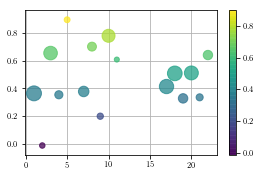

In [155]:
ax = plt.gca()
plt.scatter(inums, mccmeans, c=mccmeans, s=[x * 1000 for x in mccstds], alpha=0.75)
plt.colorbar()
ax.set_axisbelow(True)
plt.grid(which='both')

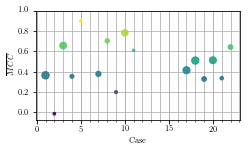

In [156]:
figures.init_summary()

## Post-processing and LOWESS filtering

In [ ]:
\begin{figure}
	\centering
	\input{samp20.pgf}
	\caption[Re-sampling scheme optimization, part 2.]{A random search was performed on the USP/OSR-plane for (A) CHB20 and (B) CHB21. The radii of points, representing $\sigma_{MCC}$, is $0.25$ that in \autoref{fig:samp_search}. In other words, $\sigma_{MCC}$ is $4\times$ greater for a given radius in this figure as compared to \autoref{fig:samp_search}.}
	\label{fig:samp20}
\end{figure}